### Etudiant 1: GIANG Phuong-Thu, Cécile (3530406)
### Etudiant 2: LENOIR Romain (3670199)

# TME 4: Perceptron et projection

In [1]:
from tme4 import *

## Implémentation de la fonction de coût perceptron

On considère dans la suite les conventions suivantes:
   * $X$ une matrice d'exemples de taille $(n, d)$
   * $w$ le vecteur poids de taille $d$
   * $y$ le vecteur des labels pour chaque exemple de $X$, de taille $n$

### Fonction de coût perceptron

$$ l_j(x) = max ( 0, -y^j <w,x^j>)$$

Son gradient est donc:

$$ \begin{equation}
  \frac{\partial l}{\partial w_j} =\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{si}\ y^j <w,x^j> \leq 0 \\
    -y^jx^j, & \text{sinon}
  \end{array}\right.
\end{equation}  $$

**Test de la fonction de coût `perceptron_loss` pour `w`, `datax` et `datay` aléatoires:**

In [2]:
# Génération des données
datax, datay = gen_arti(epsilon=0.1)
w = np.array([rd.randint(0,20) for i in range(datax.shape[1])])

# Dimensions
n, d = datax.shape
print('\nn =', n)
print('d =', d)

# Calcul du coût perceptron
print('\nCoût perceptron de dimensions:', perceptron_loss(w, datax, datay).shape )

# Calcul du gradient perceptron
print('Gradient perceptron de dimensions:', perceptron_grad(w, datax, datay).shape )


n = 1000
d = 2

Coût perceptron de dimensions: (1000, 1)
Gradient perceptron de dimensions: (1000, 2)


## Application sur les données USPS

Nous travaillons dédormais sur la base USPS, dont les données sont des chiffres manuscrits représentés par une matrice de pixels en niveau de gris de taille 16 × 16.

<img src="mnist_examples.png"  align="middle"> 

### Chargement et visualisation de quelques données USPS

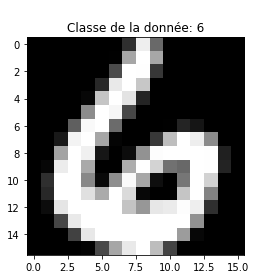

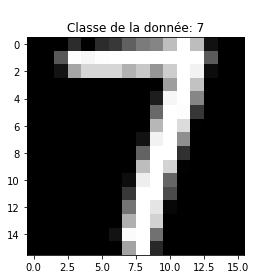

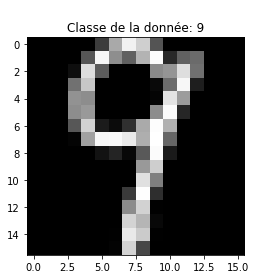

In [3]:
# Chargement des données USPS
alltrainx, alltrainy = load_usps( '../data/USPS_train.txt' )
alltestx, alltesty = load_usps( '../data/USPS_test.txt' )

# Visualisation de 3 données
for i in [0, 200, 750]:
    plt.figure()
    plt.title('\nClasse de la donnée: %d' % alltrainy[i])
    show_usps( alltrainx[i] )

### Classe `Lineaire` pour le perceptron linéaire

Nous créons une classe `Lineaire` permettant de prédire la classe $y ∈ \{-1,1\}$ des échantillons de $x$, après avoir entraîné le modèle sur les données de `xtrain` et `ytrain`.

Elle prend en **paramètres**:
   * `loss`: la fonction de coût (par défaut `perceptron_loss`)
   * `loss_g`: la fonction gradient associée (par défaut `perceptron_grad`)
   * `max_iter`: nombre d'itérations pour la descente de gradient (par défaut $1000$)
   * `eps`: pas du gradient (par défaut $0.01$)

La classe `Lineaire` a comme **méthodes**:

* `fit`: phase d'entraînement. Applique la descente de gradient afin d'approximer le paramètre $w$ qui minimise le coût du perceptron (`perceptron_loss`).

* `predict`: phase de test. Applique aux données de test `xtrain` la fonction $f_w(x)$, qui fait le produit scalaire entre $w$ et chaque $x$ de `xtest`. Le seuil de prédiction est $0$:
                * si f_w(x) < 0: le modèle prédit la classe -1
                * si f_w(x) > 0: le modèle prédit la classe 1

* `score`: calcule les scores de prédiction sur les données d'entraînement et les données de test.

### Apprentissage du perceptron pour les classes 6 et 9

Nous souhaitons tester notre classe `Lineaire` sur les données appartenant aux classes $6$ et $9$.
Afin de rester cohérent avec notre fonction de descente de gradient, nos labels doivent être transformés pour être à valeur dans $\{-1,1\}$.

Nous créons une fonction `split_data` qui charge les données USPS, isole deux classes de chiffres puis transpose leurs labels dans $\{-1,1\}$. Elle prend en argument:
   * la classe `neg`: première classe passée en argument, mise à -1
   * la classe `pos`: deuxième classe passée en argument, mise à 1
   
La fonction renvoie quatre arrays:
   * `xtrain`: échantillons d'apprentissage
   * `ytrain`: labels d'apprentissage
   * `xtest`: échantillons de test
   * `ytest`: labels de test

In [4]:
# Chargement des données de la classe 6 (pos) et 9 (neg), puis mélange
xtrain, ytrain, xtest, ytest = split_data( 6, 9 )
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)

# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))



Taux de bonne classification sur les données train:  0.985474006116208
Taux de bonne classification sur les données test:  0.9740634005763689


**Observations:**

Le taux de bonne classification, en apprentissage comme en test, est très bon. Visualisons maintenant la matrice de poids que nous venons d'apprendre.
Nous choisissons de la visualiser à différents points dans le temps afin de bien observer son adaptation à nos données.

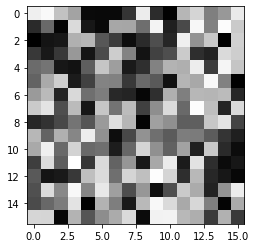

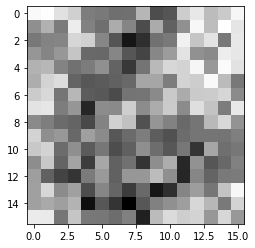

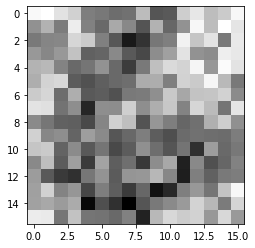

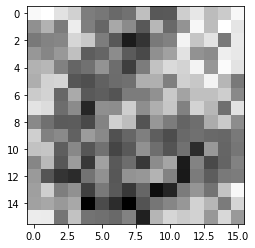

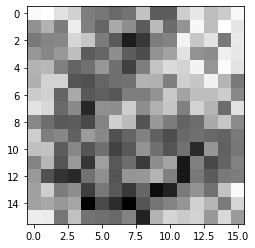

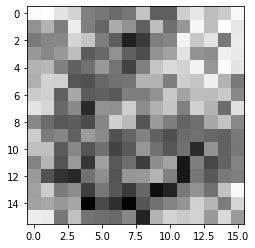

In [5]:
# Visualisation de la matrice de poids w au cours du temps
allw = model.getallw()

for i in range(len(allw)):
    if i%200 == 0:
        plt.figure()
        show_usps( np.array( allw[i] ) )

**Observations:**

L'initialisation de `w` se fait aléatoirement. Nous remarquons qu'au fil des itérations de la descente de gradient, les poids deviennent plus forts aux pixels significatifs pour la classe $6$. En particulier, il nous est possible de distinguer de plus en plus clairement la forme du chiffre 6.

### Apprentissage du perceptron pour la classe 6 contre toutes les autres

Nous souhaitons cette-fois tester notre classe `Lineaire` sur les données USPS, en ne distinguant que deux classes:
   * `neg`: classe $6$
   * `pos`: toutes les autres classes

**Chargement des données: 6 vs all**

In [6]:
# Classe à isoler de toutes les autres
neg = 6

# Récupération des données de test et d'entraînement
xtrain, ytrain = load_usps('../data/USPS_train.txt')
xtest, ytest = load_usps('../data/USPS_test.txt')

# Mélange des données
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)
    
# On remet les labels de la classe neg = 6 à -1 et ceux de la classe pos (le reste) à 1
ytrain = np.where(ytrain==neg, -1, ytrain)
ytrain = np.where(ytrain!=-1, 1, ytrain)
ytest = np.where(ytest==neg, -1, ytest)
ytest = np.where(ytest!=-1, 1, ytest)

**Apprentissage du modèle perceptron: 6 vs all**

In [7]:
# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))



Taux de bonne classification sur les données train:  0.9565217391304348
Taux de bonne classification sur les données test:  0.955655206776283


**Visualisation de la matrice de poids: 6 vs all**

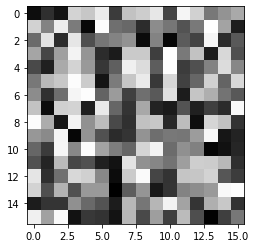

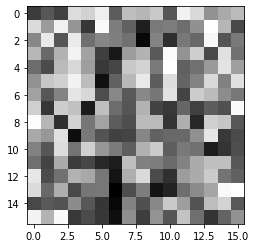

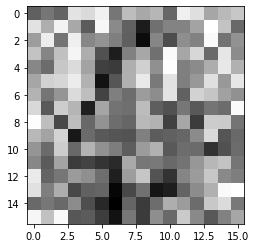

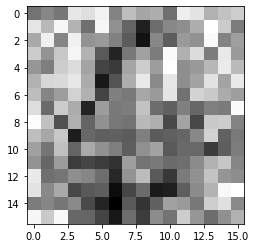

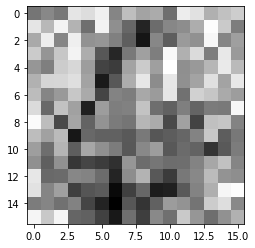

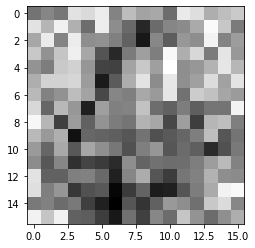

In [8]:
# Visualisation de la matrice de poids w au cours du temps
allw = model.getallw()

for i in range(len(allw)):
    if i%200 == 0:
        plt.figure()
        show_usps( np.array( allw[i] ) )

**Observations:**

Comme nous nous y attendions, le taux de bonne classification en apprentissage comme en test baisse légèrement: il est un peu plus difficile de discriminer les pixels qui sont spécifiquement importants au chiffre $6$ seulement lorsque la deuxième classe contient $9$ sous-classes (pixels importants en commun).

L'initialisation de `w` se fait aléatoirement. Comme avec l'exemple précédent, nous remarquons qu'au fil des itérations de la descente de gradient, les poids deviennent plus forts aux pixels significatifs pour les classes $6$. Cependant, le chiffre 6 n'est plus aussi distinguable la matrice des poids puisqu'il devient plus difficile de discriminer clairement les pixels pertinents pour le chiffre 6 uniquement.

### Courbes d'erreur en apprentissage et en test pour les classes 6 et 9

Nous traçons les courbes d'erreurs sur les données d'apprentissage et de test en fonction du nombre d'itérations.
Elles courbes sont tracées en apprentissage et en test sur les données de test, pour des itérations variant de $0$ à `maxIter` par pas de $100$.



Taux de bonne classification sur les données train:  0.9839449541284404
Taux de bonne classification sur les données test:  0.9711815561959655


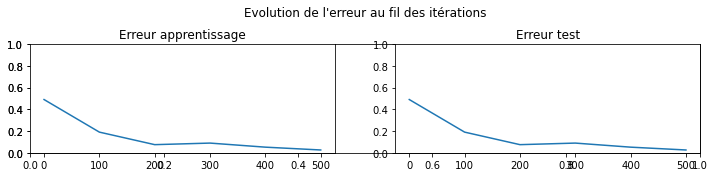

In [9]:
# Chargement des données de la classe 6 (pos) et 9 (neg), puis mélange
xtrain, ytrain, xtest, ytest = split_data( 6, 9 )
xtrain, ytrain = shuffle_data(xtrain, ytrain)
xtest, ytest = shuffle_data(xtest, ytest)

# Création de notre modèle de perceptron
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad)

# Phase d'entraînement
model.fit(xtrain, ytrain)

# Affichage du score (taux de bonne classification) en entraînement et en test
print('\n\nTaux de bonne classification sur les données train: ', model.score(xtrain, ytrain))
print('Taux de bonne classification sur les données test: ', model.score(xtest, ytest))

# Traçage du courbe des erreurs en test et en apprentissage
showError( xtest, ytest, xtest, ytest, eps= 0.01, maxIter=500 )

### Descentes de gradient batch, mini-batch, stochatique

Nous introduisons un paramètre `descent` dans notre classe `Lineaire`, qui précise la variante de la descente de gradient que nous voulons utiliser.
La variable `descent` peut prendre pour valeurs `batch` (valeur par défaut), `stochastique` ou `mini-batch`.

Traçons l'évolution du coût au fil des époques, pour chaque variante.

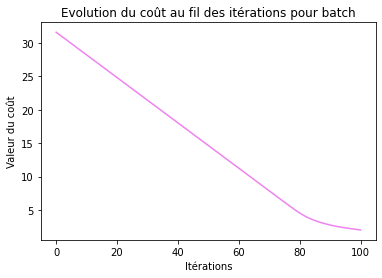

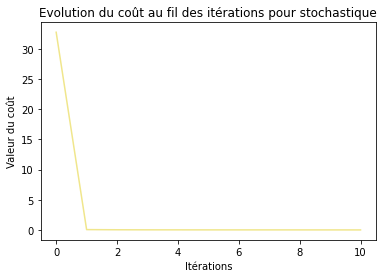

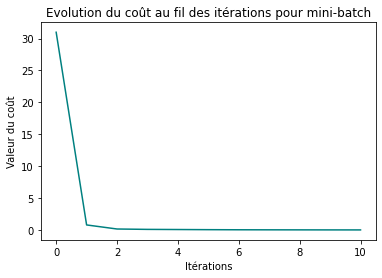

In [14]:
# Plot du coût perceptron au fil des itérations: descente de gradient batch
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=100, descent='batch', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'batch', color = 'violet')

# Descente de gradient stochastique
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=10, descent='stochastique', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour stochastique')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'stochastique', color = 'khaki')

# Descente de gradient mini-batch
w, allw, allf = descente_gradient(xtrain, ytrain, perceptron_loss, perceptron_grad, eps=0.01, maxIter=10, descent='mini-batch', mb = 10)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour mini-batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'mini-batch', color = 'teal')

**Observations:**

Nous remarquons qu'il faut bien plus d'époques à la version batch du gradient pour converger tandis qu'une à deux époques suffisent aux versions stochastiques et mini-batch. Cela est dû au fait que pour la version batch, la modification est moyennée sur tout l'ensemble d'apprentissage à chaque itération.

## Projection et pénalisation

Afin d’augmenter l’expressivité de notre modèle linéaire, nous allons utiliser des projections.

Nous créons deux fonctions de projection:
   * `proj_poly(datax)` qui renvoie la projection polynomiale de degré 2 des données : $(1, x_1, x_2, . . . , x_d, x_1^2
, x_1 x_2, . . . x_d^2)$
   * `proj_biais(datax)` qui permet d’ajouter une colonne de 1 en première colonne des données afin d’introduire un biais.

In [2]:
# Test des fonctions de projection

datax = np.array([ [1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [10,11,12] ])

print('Matrice à projeter :\n', datax)

# Projection polynomiale
print('\nProjection polynomiale: \n', proj_poly(datax))

# Projection biais
print('\nProjection biais: \n', proj_biais(datax))

Matrice à projeter :
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Projection polynomiale: 
 [[  1   1   2   3   2   4   6   3   6   9]
 [  1  16  20  24  20  25  30  24  30  36]
 [  1  49  56  63  56  64  72  63  72  81]
 [  1 100 110 120 110 121 132 120 132 144]]

Projection biais: 
 [[ 1.  1.  2.  3.]
 [ 1.  4.  5.  6.]
 [ 1.  7.  8.  9.]
 [ 1. 10. 11. 12.]]


Nous modifions le constructeur de la classe `Lineaire` afin de pouvoir ajouter une projection en paramètre, la
fonction `fit` afin qu’elle projette si besoin les données avant de faire l’apprentissage, ainsi que la
fonction `predict`.

Testons votre projection polynomiale sur les données artificielles de la fonction `gen_arti` de type 1.

**Fonction `main`:**

Nous définissons une fonction `main` qui prend en argument des données d'apprentissage (`xtrain` et `ytrain`) et des données de test (`xtest` et `ytest`), et leur applique le modèle du perceptron afin d'estimer le paramètre $w$ qui minimise le coût.

On précisera également en argument les attributs permettant de paramétrer la descente de gradient:
   * `proj`: précise la fonction de projection à utiliser (`proj_poly` par défaut)
   * `descent`: précise si l'on procède par `batch`, `stochastique` ou `mini-batch` (`batch` par défaut)
   * `eps`: le pas du gradient (`0.01` par défaut)
   * `maxIter`: le nombre d'itérations (`1000` par défaut)

La fonction `main` qui affiche:
   * la frontière de décision sur les données d'apprentissage
   * la frontière de décision sur les données de test
   * L'évolution du coût au cours du temps

**Test sur des données tirées selon 4 gaussiennes avec `proj_poly`**

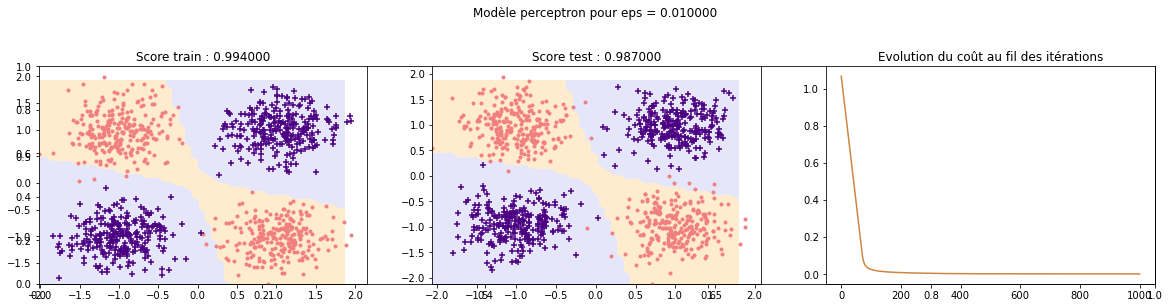

In [3]:
# Génération des données (1000 exemples suivant 4 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=1)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=1)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

**Test sur des données tirées selon un échiquier avec `proj_poly`**

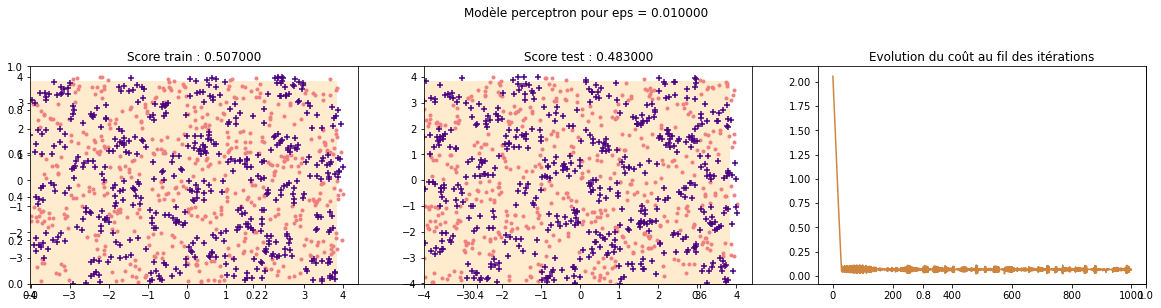

In [5]:
# Génération des données (1000 exemples suivant un échiquier)
xtrain, ytrain = gen_arti(epsilon=0.01, nbex=1000, data_type=2)
xtest, ytest = gen_arti(epsilon=0.01, nbex=1000, data_type=2)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

### Avec la projection gaussienne...

Nous rajoutons une fonction de projection gaussienne.

**Test sur des données tirées selon 4 gaussiennes avec `proj_gauss`**

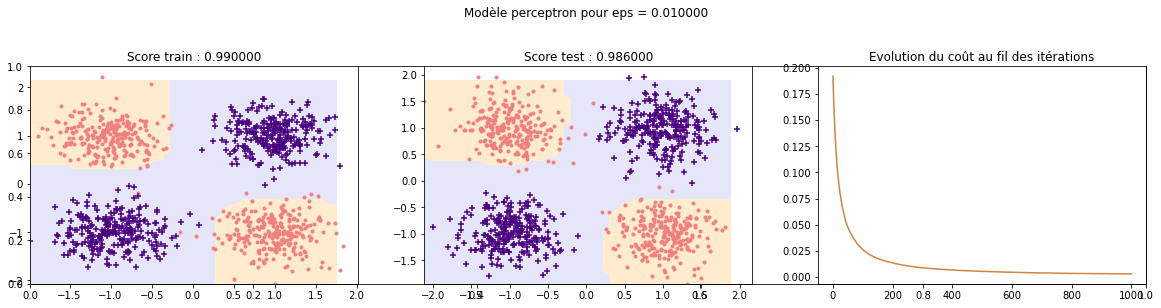

In [5]:
# Génération des données (1000 exemples suivant 4 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=1)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=1)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )

**Test sur des données tirées selon un échiquier avec `proj_gauss`**

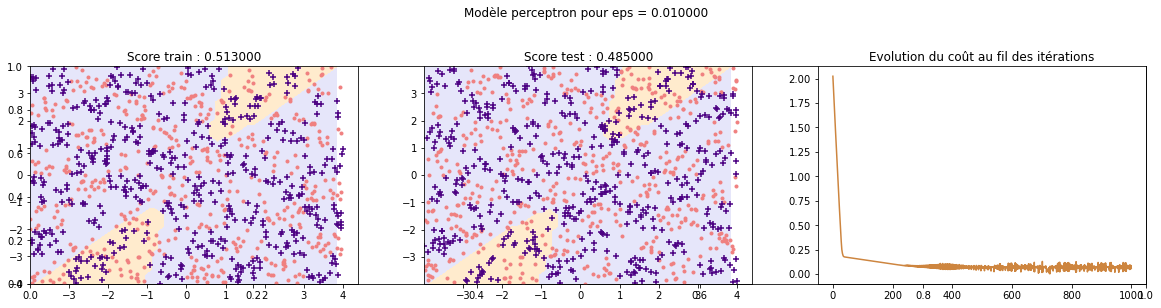

In [9]:
# Génération des données (1000 exemples suivant un échiquier)
xtrain, ytrain = gen_arti(epsilon=0.01, nbex=1000, data_type=2)
xtest, ytest = gen_arti(epsilon=0.01, nbex=1000, data_type=2)

# Création du modèle
model = Lineaire(loss = perceptron_loss, loss_g = perceptron_grad, proj = proj_poly)
model.fit(xtrain, ytrain)

# Traçage de lafrontière de décision et de l'évolution du coût pour les données train et test
main( xtrain, ytrain, xtest, ytest, proj=proj_poly, eps=0.01, maxIter=1000, descent='batch' )